In [19]:
#import numpy as np
import pandas as pd
import config
from rule_comparison import plot_pie_chart, get_common_rules, display_comparison
from operator import itemgetter
from kb_extension import extend_kb
# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [20]:

# load saved rules
original_rules = pd.read_pickle("./original_rules.pkl")
mined_rules = pd.read_pickle("./mined_rules.pkl")
mined_rules_parameters = pd.read_pickle("./mined_rules_parameters.pkl")
#mined_rules_parameters_w_random = pd.read_pickle("./mined_rules_parameters_w_random.pkl")

parameter_combinations = pd.read_pickle("./parameter_combinations.pkl")

original_rules_median_PCA = original_rules["PCA Confidence"].median()
original_rules_median_HC = original_rules["Head Coverage"].median()


In [3]:
"""
# load saved rules
original_rules = pd.read_pickle("./max_entities_250/original_rules.pkl")
mined_rules = pd.read_pickle("./max_entities_250/mined_rules.pkl")
mined_rules_parameters = pd.read_pickle("./max_entities_250/mined_rules_parameters.pkl")
#mined_rules_parameters_w_random = pd.read_pickle("./mined_rules_parameters_w_random.pkl")

parameter_combinations = pd.read_pickle("./max_entities_250/parameter_combinations.pkl")

original_rules_median_PCA = original_rules["PCA Confidence"].median()
original_rules_median_HC = original_rules["Head Coverage"].median()
"""

In [21]:
import numpy as np
import models
from rule_mining import rule_mining

original_kb = np.loadtxt("family_subset.txt", dtype = 'object')


In [22]:
# add rules mined from randomly selected candidates
extended_kb, admitted_candidates = extend_kb(original_kb, models.complEx, "probabilistic", ("random", 1100), max_entities=250)
rules = rule_mining(extended_kb)
number_of_rules = len(rules)
parameter_list = ["Rand cand","Rand cand","Rand cand"]
parameter_full = [parameter_list for j in range(number_of_rules)]
parameter_full_df = pd.DataFrame(parameter_full, columns=["Model", "Entity_selection", "Candidate_criteria"])
original_rules_parameters= pd.concat([rules, parameter_full_df], axis=1)
original_rules_parameters['PCA Confidence'] = original_rules_parameters['PCA Confidence'].apply(lambda x: float(x.replace(',','.')))
original_rules_parameters['Head Coverage'] = original_rules_parameters['Head Coverage'].apply(lambda x: float(x.replace(',','.')))
#mined_rules.append(original_rules_parameters)
mined_rules_parameters = pd.concat([mined_rules_parameters,original_rules_parameters])

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/ampligraph/latent_features/models/EmbeddingModel.py:1329: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if corruption_entities == 'all':
100%|██████████| 371991/371991 [05:04<00:00, 1219.69it/s]


In [7]:
mined_rules_parameters['Candidate_criteria'].unique()

array(["('rank_cutoff', 1)", "('rank_cutoff', 4)", "('rank_cutoff', 7)",
       "('percent', 1)", "('percent', 6)", 'Original rules', 'Rand cand'],
      dtype=object)

In [23]:
mined_rules_parameters = mined_rules_parameters.loc[(mined_rules_parameters["Candidate_criteria"] == "('rank_cutoff', 1)") | (mined_rules_parameters["Candidate_criteria"] == 'Original rules') | (mined_rules_parameters["Candidate_criteria"] == 'Rand cand')]

In [24]:
mined_rules_parameters

,Rule,Head Coverage,PCA Confidence,Positive Examples,PCA Body size,Functional variable,Model,Entity_selection,Candidate_criteria
0,?b relative ?a => ?a relative ?b,0.548407,0.843377,2617,3103,-2,ComplEx,probabilistic,"('rank_cutoff', 1)"
1,?b child ?a => ?a mother ?b,0.974516,0.534637,16099,30112,-1,ComplEx,probabilistic,"('rank_cutoff', 1)"
2,?b spouse ?a => ?a spouse ?b,0.947725,0.992204,44291,44639,-1,ComplEx,probabilistic,"('rank_cutoff', 1)"
3,?b child ?a => ?a father ?b,0.941634,0.769635,47174,61294,-1,ComplEx,probabilistic,"('rank_cutoff', 1)"
4,?b mother ?a => ?a child ?b,0.247285,0.988154,16099,16292,-2,ComplEx,probabilistic,"('rank_cutoff', 1)"
...,...,...,...,...,...,...,...,...,...
80,?g child ?a ?g child ?b => ?a sibling ?b,0.800214,0.660307,60665,91874,-2,Rand cand,Rand cand,Rand cand
81,?a child ?g ?g sibling ?b => ?a child ?b,0.485590,0.835992,31659,37870,-2,Rand cand,Rand cand,Rand cand
82,?h sibling ?a ?b sibling ?h => ?a sibl...,0.714553,0.579586,54171,93465,-2,Rand cand,Rand cand,Rand cand
83,?g father ?b ?g sibling ?a => ?a fathe...,0.425494,0.939317,21330,22708,-1,Rand cand,Rand cand,Rand cand


## Visualization of rule metrics

In [25]:
def get_dataframe_to_plot(all_rules, parameter_type, parameter_name):
    """
    Generate dataframe containing rules mined with certain parameter value
    """
    rules = all_rules.loc[(all_rules[parameter_type] == parameter_name)]
    return rules

In [26]:
mined_rules_parameters

,Rule,Head Coverage,PCA Confidence,Positive Examples,PCA Body size,Functional variable,Model,Entity_selection,Candidate_criteria
0,?b relative ?a => ?a relative ?b,0.548407,0.843377,2617,3103,-2,ComplEx,probabilistic,"('rank_cutoff', 1)"
1,?b child ?a => ?a mother ?b,0.974516,0.534637,16099,30112,-1,ComplEx,probabilistic,"('rank_cutoff', 1)"
2,?b spouse ?a => ?a spouse ?b,0.947725,0.992204,44291,44639,-1,ComplEx,probabilistic,"('rank_cutoff', 1)"
3,?b child ?a => ?a father ?b,0.941634,0.769635,47174,61294,-1,ComplEx,probabilistic,"('rank_cutoff', 1)"
4,?b mother ?a => ?a child ?b,0.247285,0.988154,16099,16292,-2,ComplEx,probabilistic,"('rank_cutoff', 1)"
...,...,...,...,...,...,...,...,...,...
80,?g child ?a ?g child ?b => ?a sibling ?b,0.800214,0.660307,60665,91874,-2,Rand cand,Rand cand,Rand cand
81,?a child ?g ?g sibling ?b => ?a child ?b,0.485590,0.835992,31659,37870,-2,Rand cand,Rand cand,Rand cand
82,?h sibling ?a ?b sibling ?h => ?a sibl...,0.714553,0.579586,54171,93465,-2,Rand cand,Rand cand,Rand cand
83,?g father ?b ?g sibling ?a => ?a fathe...,0.425494,0.939317,21330,22708,-1,Rand cand,Rand cand,Rand cand


### Parameter 1: KG embeddings

In [27]:
complEx_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "ComplEx")
distMult_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "DistMult")
transE_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "TransE")
randomBaseline_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "RandomBaseline")
random_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "Rand cand")


complEx
Unique original: 10  Unique expanded: 23  Common rules: 84


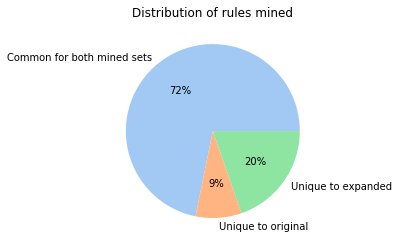


distMult
Unique original: 9  Unique expanded: 22  Common rules: 85


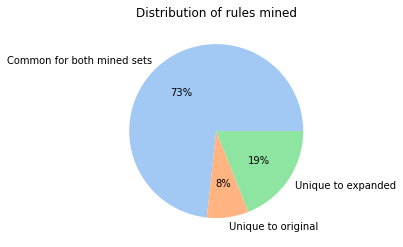


transE
Unique original: 8  Unique expanded: 353  Common rules: 86


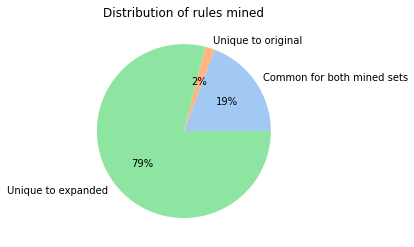


randomBaseline
Unique original: 9  Unique expanded: 16  Common rules: 85


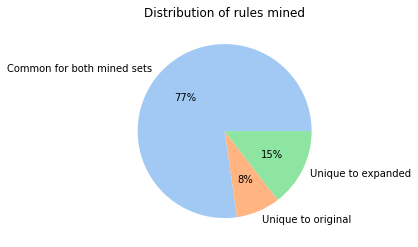


random
Unique original: 21  Unique expanded: 12  Common rules: 73


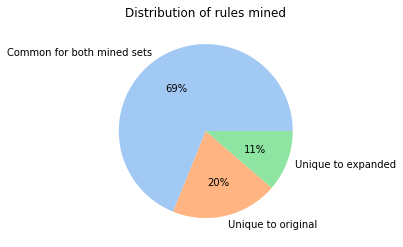

In [28]:
display_comparison("complEx", original_rules, complEx_rules.drop_duplicates("Rule"))
display_comparison("distMult", original_rules, distMult_rules.drop_duplicates("Rule"))
display_comparison("transE", original_rules, transE_rules.drop_duplicates("Rule"))
display_comparison("randomBaseline", original_rules, randomBaseline_rules.drop_duplicates("Rule"))
display_comparison("random", original_rules, random_rules.drop_duplicates("Rule"))

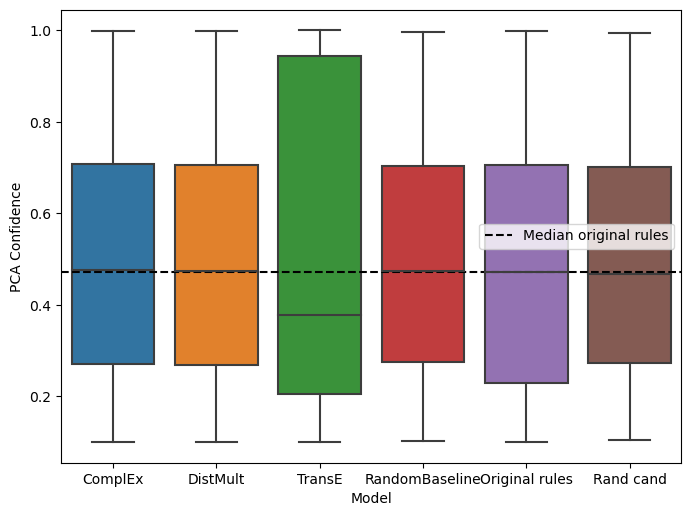

In [29]:
plt.subplots(figsize=(8,6), dpi=100)
ax = sns.boxplot(x="Model", y="PCA Confidence", data=mined_rules_parameters)
plt.axhline(original_rules_median_PCA, color="black", label="Median original rules", linestyle="--")
plt.legend()
plt.savefig("Max_entities=250_randcand=600_rank=1.png")

In [15]:
mined_rules_parameters

,Rule,Head Coverage,PCA Confidence,Positive Examples,PCA Body size,Functional variable,Model,Entity_selection,Candidate_criteria
0,?b relative ?a => ?a relative ?b,0.550657,0.844329,2598,3077,-2,ComplEx,probabilistic,"('rank_cutoff', 1)"
1,?b child ?a => ?a mother ?b,0.976620,0.535282,16082,30044,-1,ComplEx,probabilistic,"('rank_cutoff', 1)"
2,?b spouse ?a => ?a spouse ?b,0.947886,0.992303,44217,44560,-1,ComplEx,probabilistic,"('rank_cutoff', 1)"
3,?b child ?a => ?a father ?b,0.942017,0.769712,47131,61232,-1,ComplEx,probabilistic,"('rank_cutoff', 1)"
4,?b mother ?a => ?a child ?b,0.247252,0.990271,16082,16240,-2,ComplEx,probabilistic,"('rank_cutoff', 1)"
...,...,...,...,...,...,...,...,...,...
83,?g child ?a ?g child ?b => ?a sibling ?b,0.800813,0.663270,60664,91462,-2,Rand cand,Rand cand,Rand cand
84,?g sibling ?b ?a sibling ?g => ?a sibl...,0.720117,0.584960,54551,93256,-2,Rand cand,Rand cand,Rand cand
85,?a sibling ?h ?b sibling ?h => ?a sibl...,0.717741,0.586989,54371,92627,-2,Rand cand,Rand cand,Rand cand
86,?h sibling ?a ?b sibling ?h => ?a sibl...,0.715087,0.582392,54170,93013,-2,Rand cand,Rand cand,Rand cand


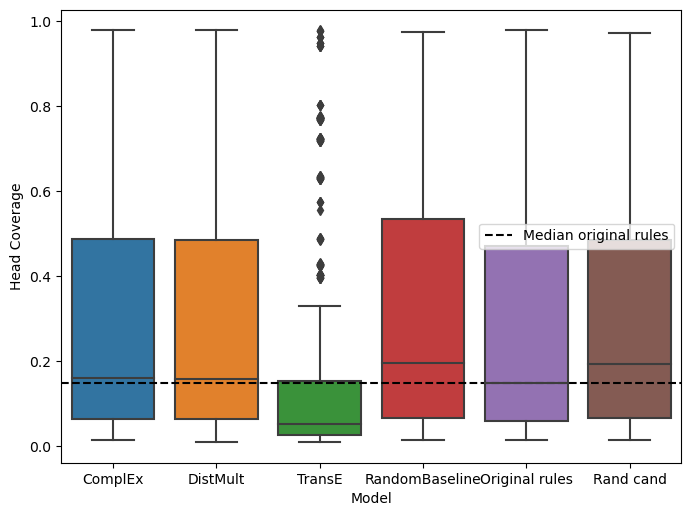

In [15]:
plt.subplots(figsize=(8,6), dpi=100)
ax = sns.boxplot(x="Model", y="Head Coverage", data=mined_rules_parameters)
plt.axhline(original_rules_median_HC, color = "black", label="Median original rules", linestyle="--")
plt.legend()

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

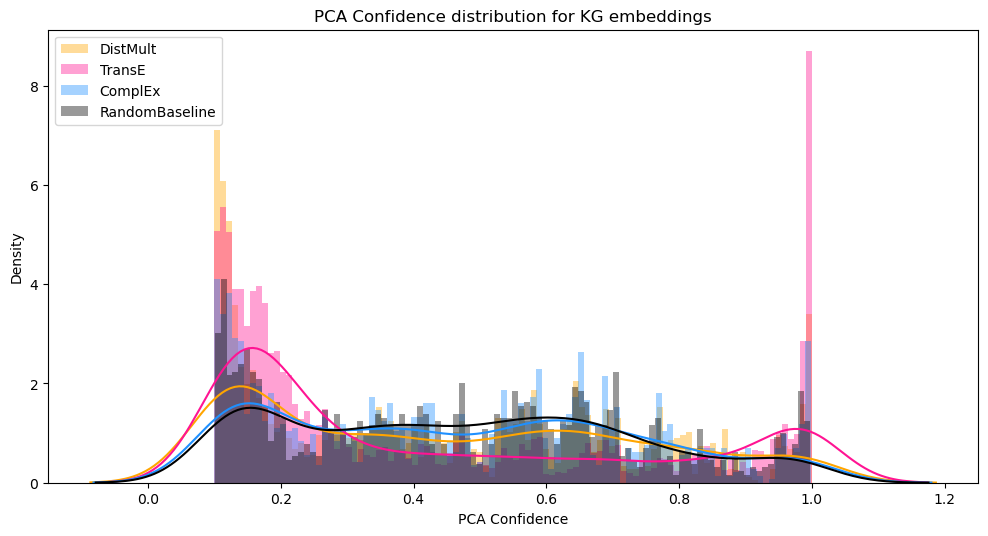

In [13]:
plt.subplots(figsize=(12,6), dpi=100)
sns.distplot(distMult_rules["PCA Confidence"] , color="orange", bins = 100, label="DistMult")
sns.distplot(transE_rules["PCA Confidence"] , color="deeppink", bins = 100, label="TransE")
sns.distplot(complEx_rules["PCA Confidence"] , color="dodgerblue", bins = 100, label="ComplEx")
sns.distplot(randomBaseline_rules["PCA Confidence"] , color="black", bins = 100, label="RandomBaseline")


plt.title('PCA Confidence distribution for KG embeddings')
plt.legend();

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

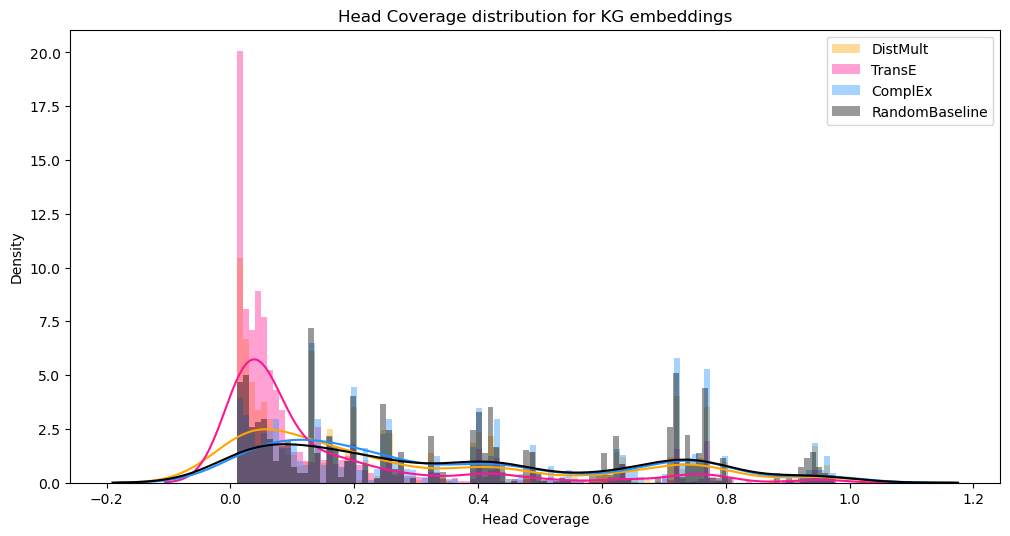

In [14]:
plt.subplots(figsize=(12,6), dpi=100)
sns.distplot(distMult_rules["Head Coverage"] , color="orange", bins = 100, label="DistMult")
sns.distplot(transE_rules["Head Coverage"] , color="deeppink", bins = 100, label="TransE")
sns.distplot(complEx_rules["Head Coverage"] , color="dodgerblue", bins = 100, label="ComplEx")
sns.distplot( randomBaseline_rules["Head Coverage"] , color="black", bins = 100, label="RandomBaseline")


plt.title('Head Coverage distribution for KG embeddings')
plt.legend();

### Parameter 2: entity selection method

In [15]:
random_entity_rules = get_dataframe_to_plot(mined_rules_parameters, "Entity_selection", "random")
most_frequent_entity_rules = get_dataframe_to_plot(mined_rules_parameters, "Entity_selection", "most_frequent")
least_frequent_entity_rules = get_dataframe_to_plot(mined_rules_parameters, "Entity_selection", "least_frequent")
probabilistic_entity_rules = get_dataframe_to_plot(mined_rules_parameters, "Entity_selection", "probabilistic")

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 446  Common rules: 94


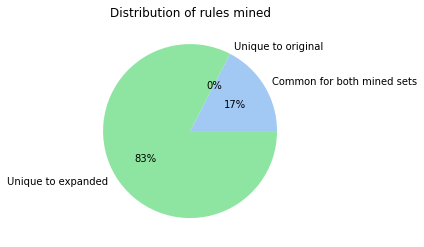

EXPANDED RULE SET  0
Unique original: 4  Unique expanded: 407  Common rules: 89


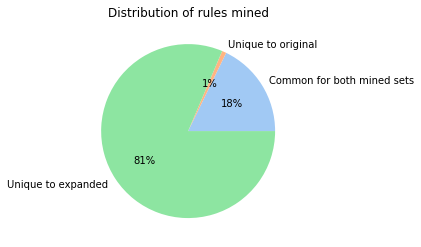

EXPANDED RULE SET  0
Unique original: 3  Unique expanded: 522  Common rules: 91


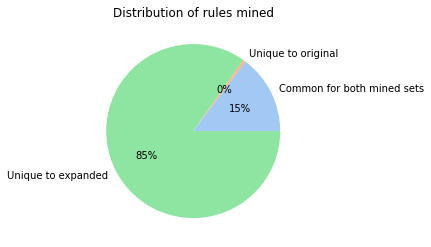

EXPANDED RULE SET  0
Unique original: 3  Unique expanded: 369  Common rules: 91


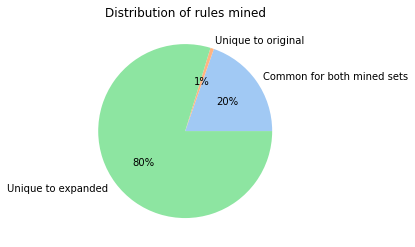

In [16]:
display_comparison(original_rules, random_entity_rules.drop_duplicates("Rule"))
display_comparison(original_rules, most_frequent_entity_rules.drop_duplicates("Rule"))
display_comparison(original_rules, least_frequent_entity_rules.drop_duplicates("Rule"))
display_comparison(original_rules, probabilistic_entity_rules.drop_duplicates("Rule"))

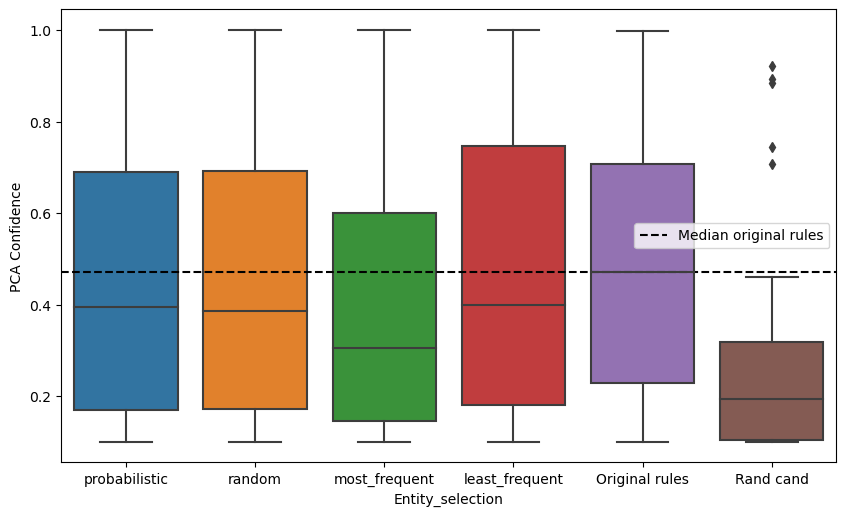

In [17]:
plt.subplots(figsize=(10,6), dpi=100)
ax = sns.boxplot(x="Entity_selection", y="PCA Confidence", data=mined_rules_parameters)
plt.axhline(original_rules_median_PCA, color = "black", label="Median original rules", linestyle="--")
plt.legend()


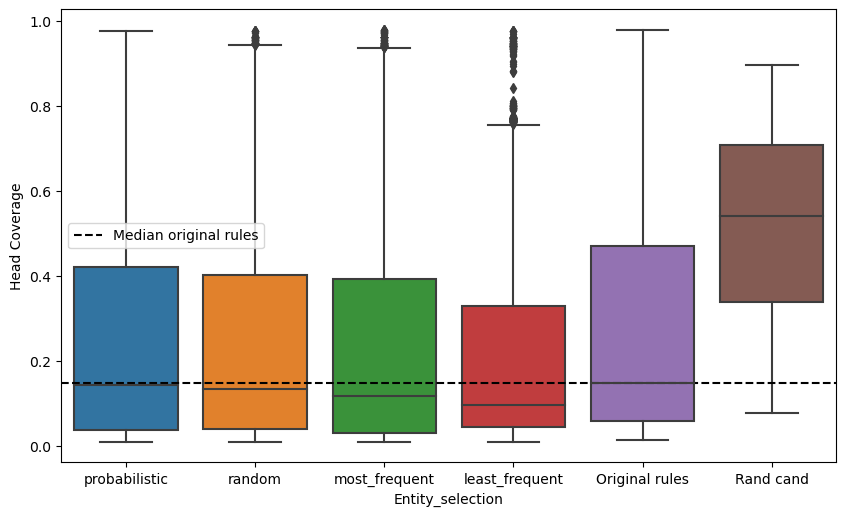

In [18]:
plt.subplots(figsize=(10,6), dpi=100)
ax = sns.boxplot(x="Entity_selection", y="Head Coverage", data=mined_rules_parameters)
plt.axhline(original_rules_median_HC, color = "black", label="Median original rules", linestyle="--")
plt.legend()

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

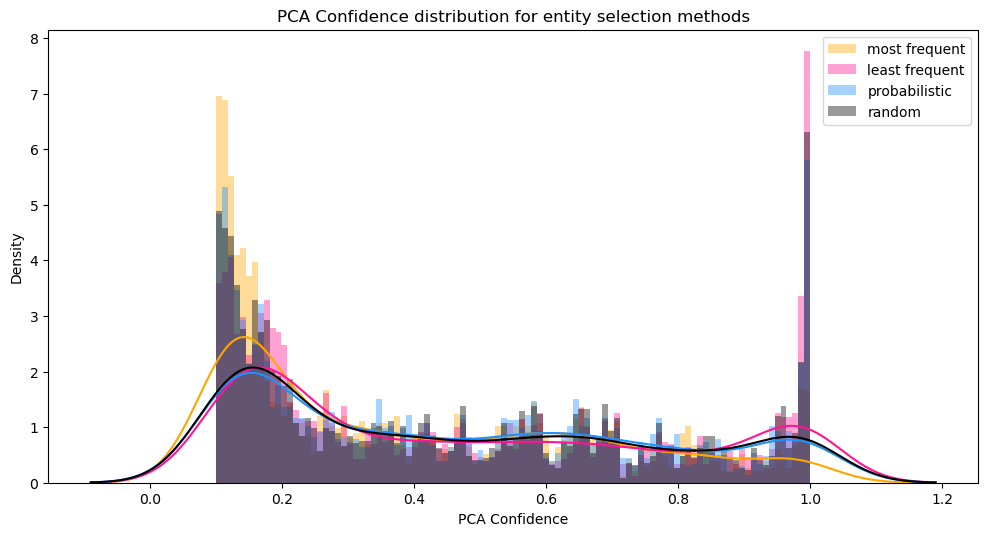

In [19]:
plt.subplots(figsize=(12,6), dpi=100)
sns.distplot(most_frequent_entity_rules["PCA Confidence"] , color="orange", bins = 100, label="most frequent")
sns.distplot(least_frequent_entity_rules["PCA Confidence"] , color="deeppink", bins = 100, label="least frequent")
sns.distplot( probabilistic_entity_rules["PCA Confidence"] , color="dodgerblue", bins = 100, label="probabilistic")
sns.distplot(random_entity_rules["PCA Confidence"] , color="black", bins = 100, label="random")


plt.title('PCA Confidence distribution for entity selection methods')
plt.legend();

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

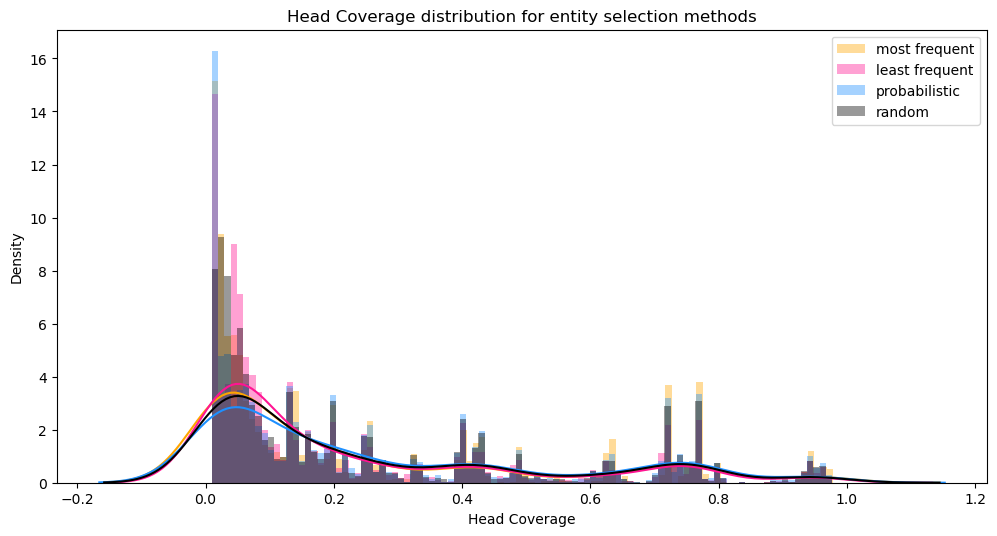

In [20]:
plt.subplots(figsize=(12,6), dpi=100)
sns.distplot(most_frequent_entity_rules["Head Coverage"] , color="orange", bins = 100, label="most frequent")
sns.distplot(least_frequent_entity_rules["Head Coverage"] , color="deeppink", bins = 100, label="least frequent")
sns.distplot( probabilistic_entity_rules["Head Coverage"] , color="dodgerblue", bins = 100, label="probabilistic")
sns.distplot(random_entity_rules["Head Coverage"] , color="black", bins = 100, label="random")


plt.title('Head Coverage distribution for entity selection methods')
plt.legend();

### Parameter 3: candidate admittance criteria

In [21]:
mined_rules_parameters['Candidate_criteria'] =  mined_rules_parameters.Candidate_criteria.astype(str)

In [22]:
config.rank_cutoffs

[('rank_cutoff', 1), ('rank_cutoff', 4), ('rank_cutoff', 7)]

EXPANDED RULE SET  0
Unique original: 1  Unique expanded: 275  Common rules: 93


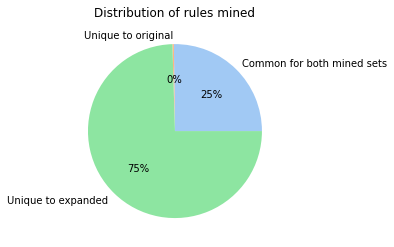

EXPANDED RULE SET  0
Unique original: 1  Unique expanded: 300  Common rules: 93


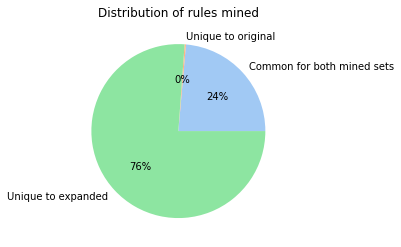

EXPANDED RULE SET  0
Unique original: 1  Unique expanded: 369  Common rules: 93


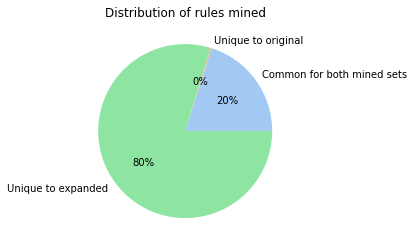

In [23]:
for rank in config.rank_cutoffs:
    rank_df = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", str(rank))
    display_comparison(original_rules, rank_df.drop_duplicates("Rule"))

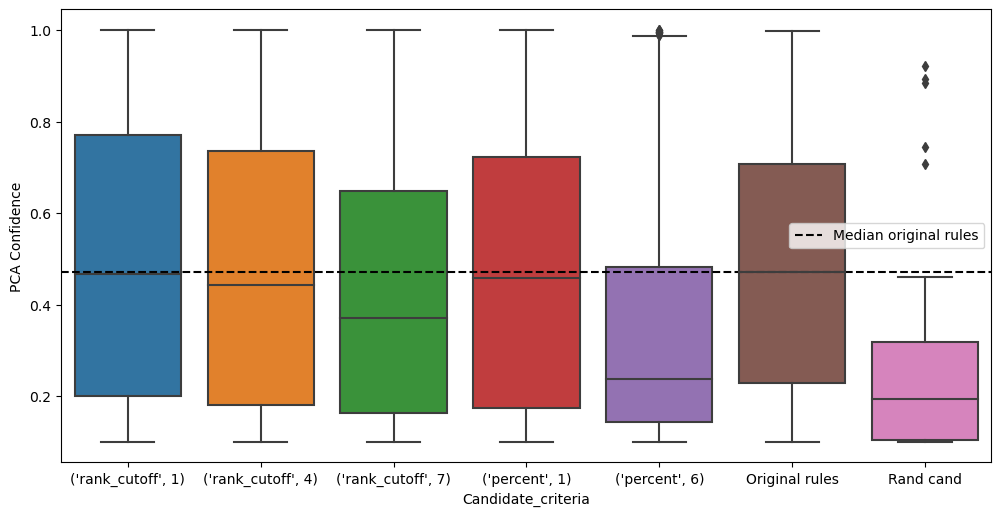

In [24]:
plt.subplots(figsize=(12,6), dpi=100)
ax = sns.boxplot(x="Candidate_criteria", y="PCA Confidence", data=mined_rules_parameters)
plt.axhline(original_rules_median_PCA, color = "black", label="Median original rules", linestyle="--")
plt.legend()

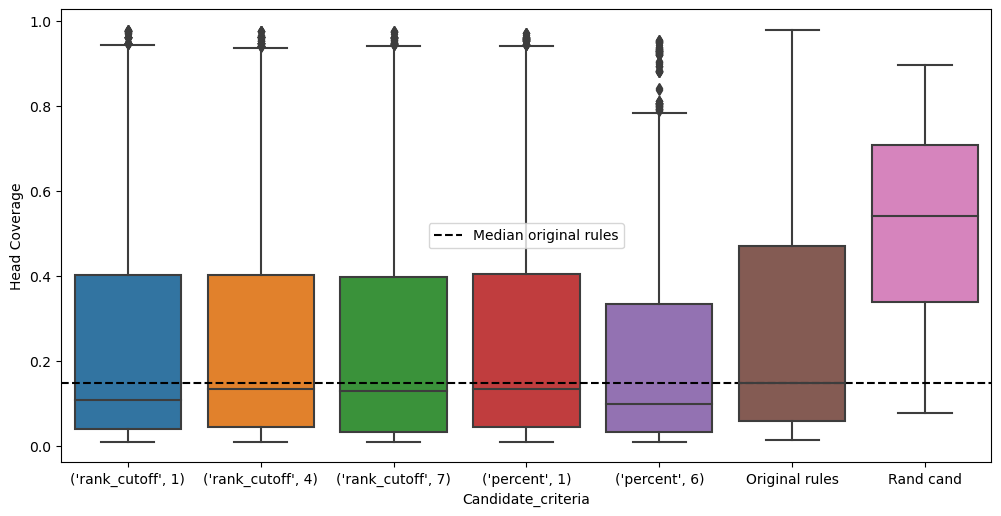

In [25]:
plt.subplots(figsize=(12,6), dpi=100)
ax = sns.boxplot(x="Candidate_criteria", y="Head Coverage", data=mined_rules_parameters)
plt.axhline(original_rules_median_HC, color = "black", label="Median original rules", linestyle="--")
plt.legend()

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


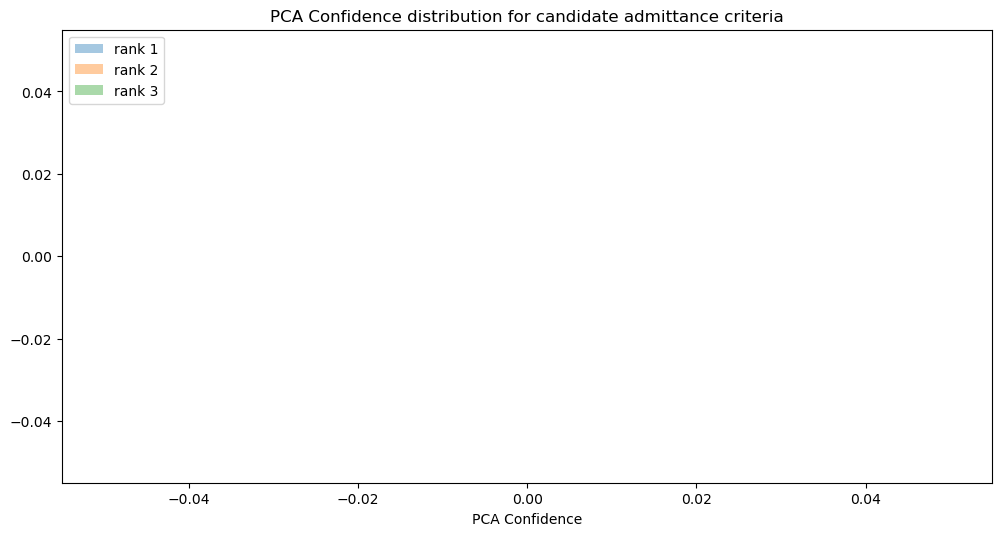

In [26]:
plt.subplots(figsize=(12,6), dpi=100)
for i, rank in enumerate(config.rank_cutoffs):
    rules_set = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", rank)
    sns.distplot(rules_set["PCA Confidence"] , color=sns.color_palette()[i], bins = 100, label="rank " +str(i+1))
plt.title('PCA Confidence distribution for candidate admittance criteria')
plt.legend();

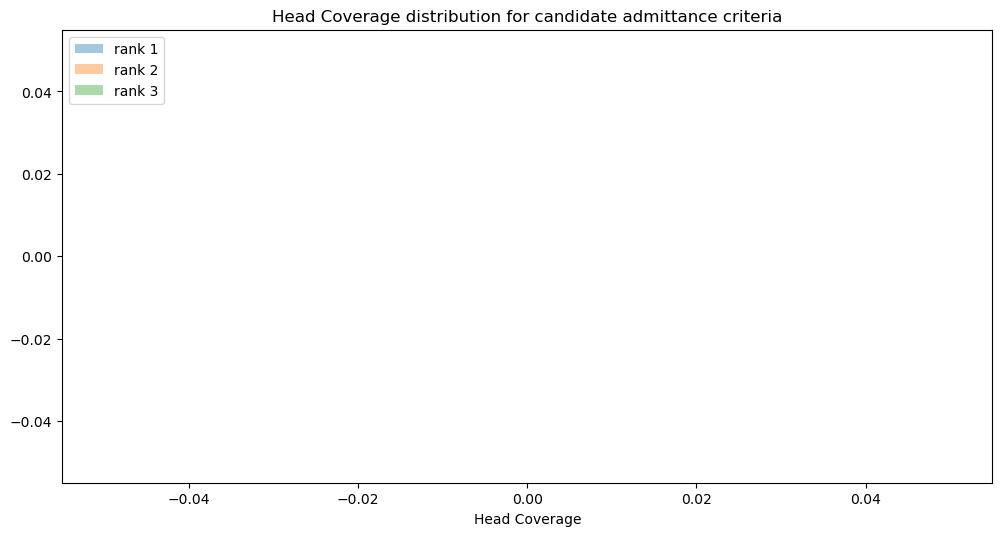

In [27]:
plt.subplots(figsize=(12,6), dpi=100)
for i, rank in enumerate(config.rank_cutoffs):
    rules_set = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", rank)
    sns.distplot(rules_set["Head Coverage"] , color=sns.color_palette()[i], bins = 100, label="rank " +str(i+1))
plt.title('Head Coverage distribution for candidate admittance criteria')
plt.legend();

EXPANDED RULE SET  0
Unique original: 1  Unique expanded: 317  Common rules: 85


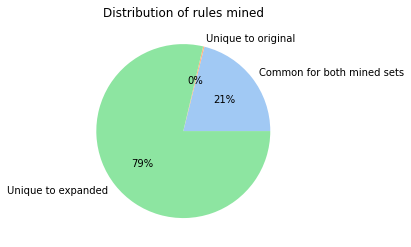

EXPANDED RULE SET  0
Unique original: 3  Unique expanded: 591  Common rules: 91


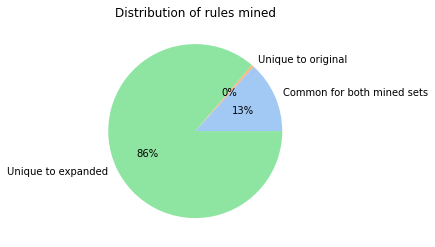

In [28]:
for percent in config.percents:
    percent_df = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", str(percent))
    display_comparison(original_rules, percent_df.drop_duplicates("Rule"))

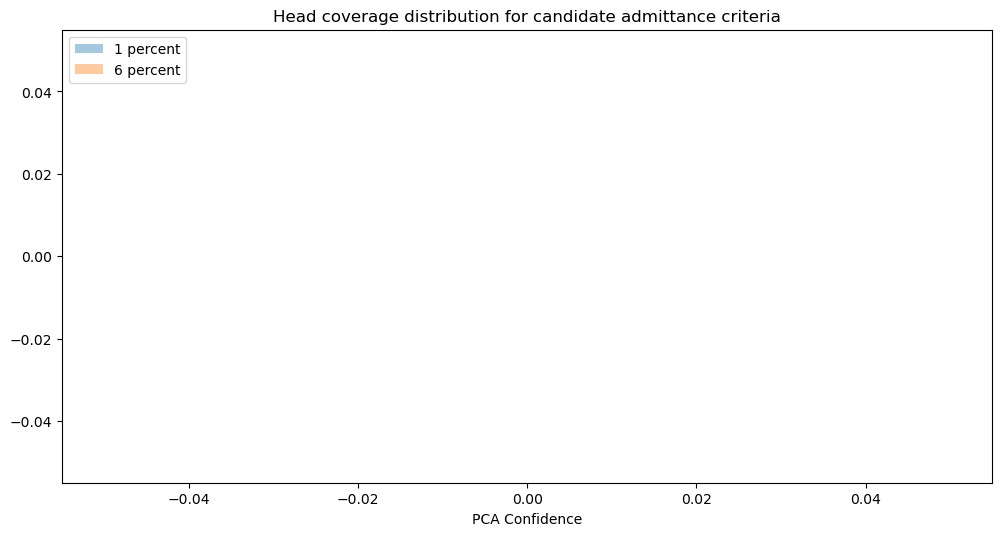

In [29]:
plt.subplots(figsize=(12,6), dpi=100)
for i, percentage in enumerate(config.percents):
    rules_set = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", percentage)
    sns.distplot(rules_set["PCA Confidence"] , color=sns.color_palette()[i], bins = 100, label=str(percentage[1]) + " percent")
plt.title('Head coverage distribution for candidate admittance criteria')
plt.legend();

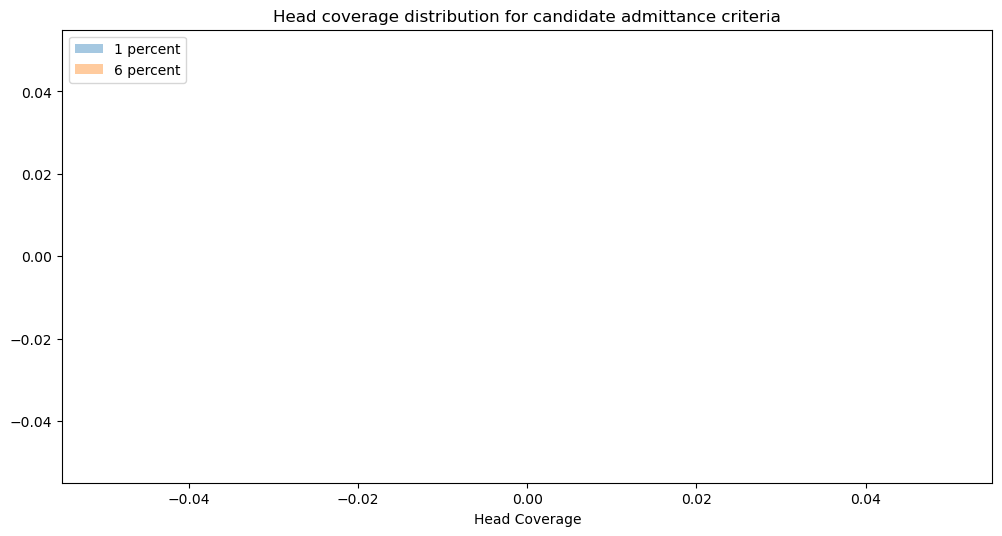

In [30]:
plt.subplots(figsize=(12,6), dpi=100)
for i, percentage in enumerate(config.percents):
    if i > 2:
        continue
    rules_set = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", percentage)
    sns.distplot(rules_set["Head Coverage"] , color=sns.color_palette()[i], bins = 100, label=str(percentage[1]) + " percent")
plt.title('Head coverage distribution for candidate admittance criteria')
plt.legend();

### PCA Confidence vs Head Coverage

In [31]:
def plot_scatterplot(mined_rules_df, parameter="Model"):
    plt.subplots(figsize=(12,6), dpi=100)
    plot = sns.scatterplot(data=mined_rules_df.sample(frac=1), x="PCA Confidence", y="Head Coverage", hue=parameter, alpha=1)
    plot.set_xlim(0.09, 0.5)
    plot.set_ylim(0, 0.16)
    plot.set_title("PCA Confidence vs Head coverage per " +parameter.lower())
    plt.legend()

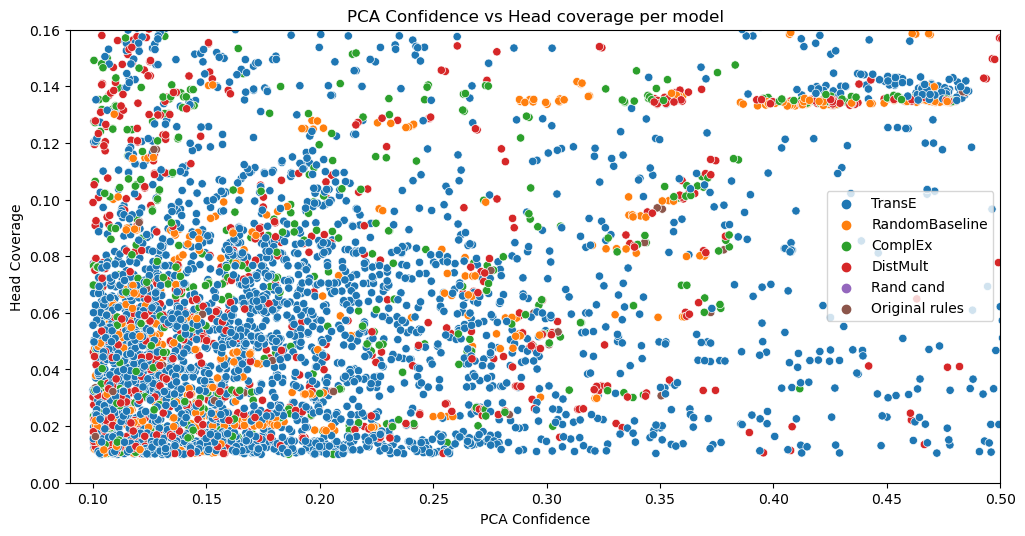

In [32]:
plot_scatterplot(mined_rules_parameters, parameter="Model")

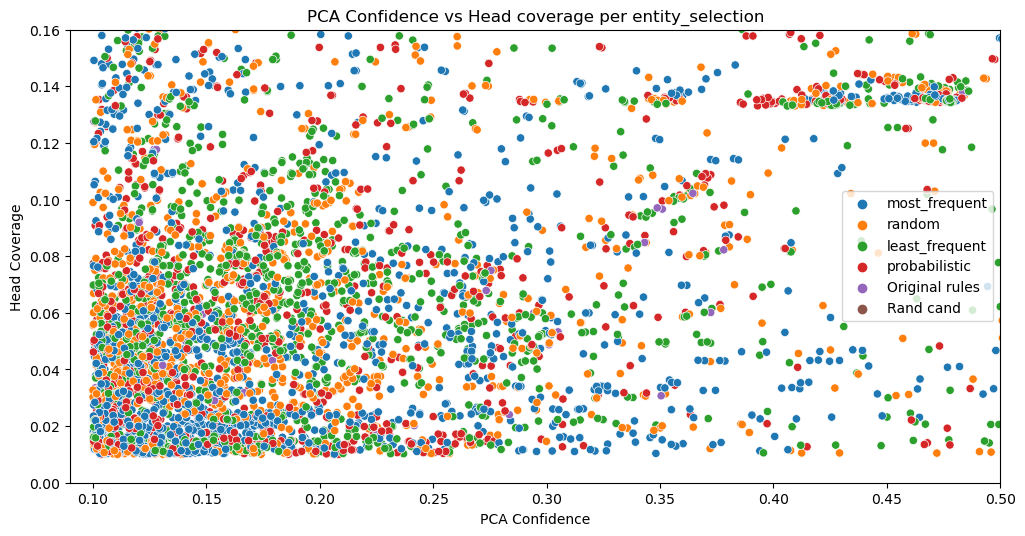

In [33]:
plot_scatterplot(mined_rules_parameters, parameter="Entity_selection")

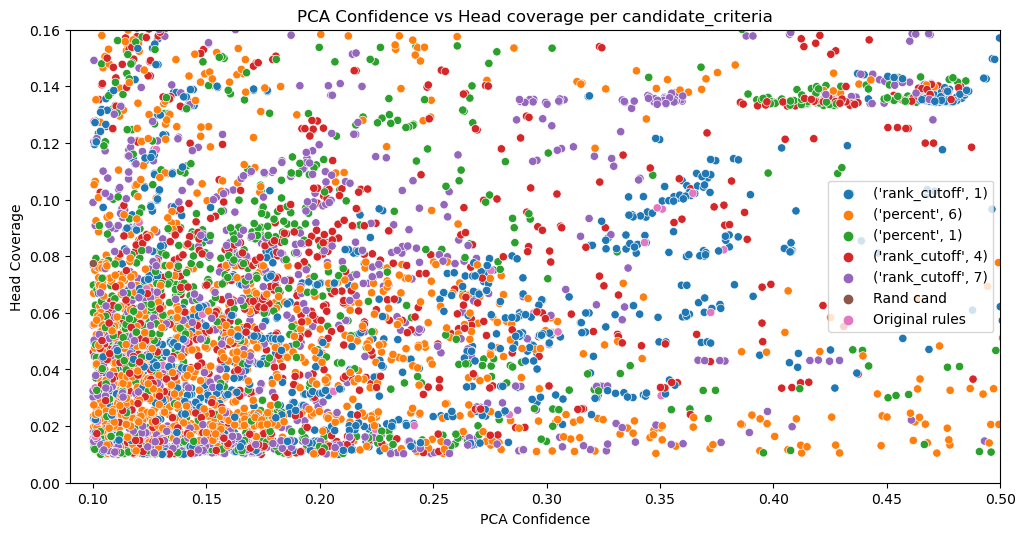

In [34]:
plot_scatterplot(mined_rules_parameters, parameter="Candidate_criteria")